Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')
library('tidyr')


Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.7     ✔ recipes      1.2.0
✔ dials        1.4.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.3.0
✔ modeldata    1.4.0     ✔ workflows    1.2.0
✔ parsnip      1.3.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.4     ✔ yardstick    1.3.2

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)



Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 4, 10, 1, 3, 8, 1, 13, 5, 5, 3, …
$ Glucose                  <dbl> 85, 89, 116, 115, 110, 139, 103, 126, 99, 97,…
$ BloodPressure            <dbl> 66, 66, 74, 0, 92, 80, 30, 88, 84, 66, 82, 92…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 0, 38, 41, 0, 15, 19, 0, 26,…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 0, 83, 235, 0, 140, 110, 0, 0…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 37.6, 27.1, 43.3, 39.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.191, 1.441, 0.1…
$ Age                      <dbl> 31, 21, 30, 29, 30, 57, 33, 27, 50, 22, 57, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

In a logistic regression model, the outcome variable should be a categorical variable and in this dataset 'Outcome' would be the most suitable variable as it has a binary choice betweeen a patient who has diabetes (1) and a patient who doesn't (0).

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test           |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

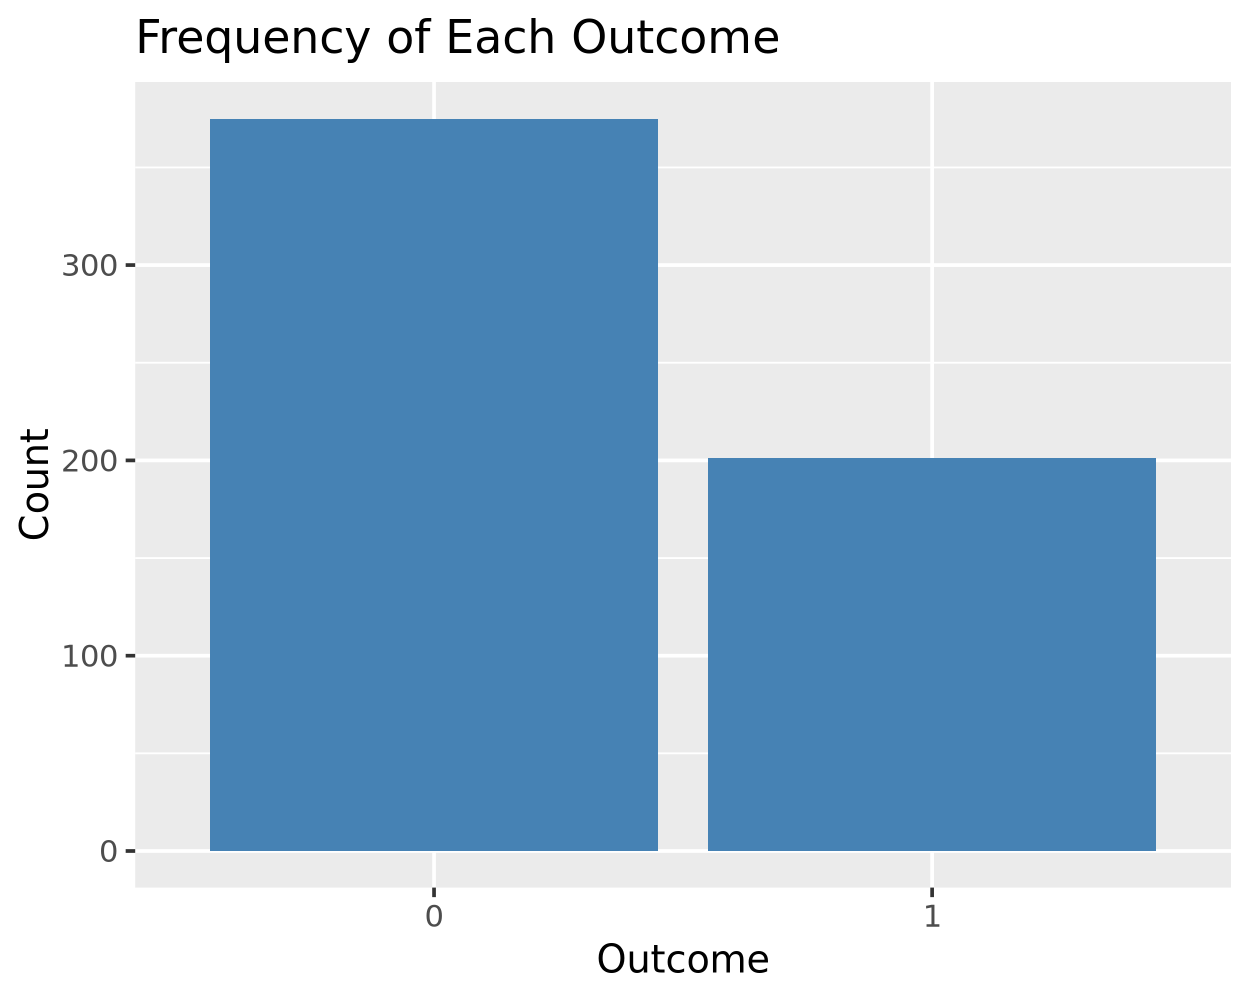

In [4]:
ggplot(diabetes_train, aes(x = Outcome)) + geom_bar(fill = "steelblue") +
    labs(title = "Frequency of Each Outcome",x = "Outcome",y = "Count") 
   

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No, the data is not balanced with the "0" outcome almost double the count of "1" outcome.


Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [8]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

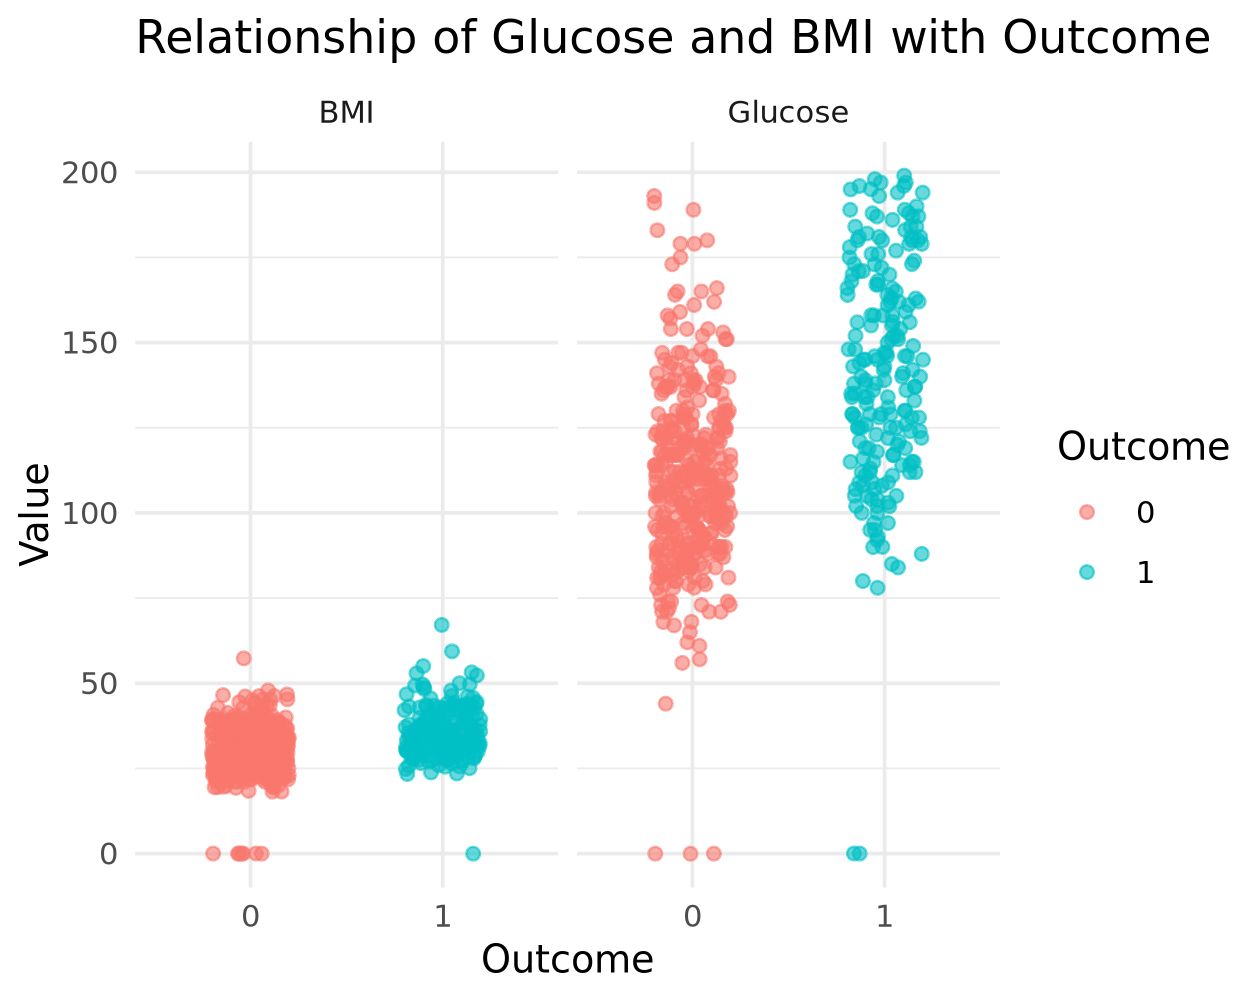

In [9]:
ggplot(plot_df, aes(x = Outcome, y = value, color = Outcome)) +
    geom_jitter(width = 0.2, alpha = 0.6) + 
    facet_wrap(~name, ncol = 2, scales = 'free_x') +
    labs(title = "Relationship of Glucose and BMI with Outcome",
         x = "Outcome",
         y = "Value") +
    theme_minimal()



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

In this scenario, removing the argument doesn't seem to make any changes at least visibly. 

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [10]:
mod_fit <- glm(Outcome ~ BMI + Glucose, data = diabetes_train, family = binomial)

summary(mod_fit)




Call:
glm(formula = Outcome ~ BMI + Glucose, family = binomial, data = diabetes_train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.802578   0.705623 -11.058  < 2e-16 ***
BMI          0.087750   0.015430   5.687 1.29e-08 ***
Glucose      0.034401   0.003759   9.152  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 567.64  on 573  degrees of freedom
AIC: 573.64

Number of Fisher Scoring iterations: 5


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [11]:
diabetes_test_wPred <- augment(mod_fit, new_data = diabetes_test, type.predict = "response")

head(diabetes_test_wPred)



Outcome,BMI,Glucose,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,26.6,85,0.07280630,-0.3888259,0.003097103,0.9960454,8.156938e-05,-0.3894294
0,28.1,89,0.09320358,-0.4423512,0.003145365,0.9960063,1.084448e-04,-0.4430486
0,25.6,116,0.17283271,-0.6160330,0.003765949,0.9958442,2.642792e-04,-0.6171962
0,35.3,115,0.32105866,-0.8800233,0.002992276,0.9954967,4.744992e-04,-0.8813429
0,37.6,110,0.32759324,-0.8909454,0.004248757,0.9954788,6.958919e-04,-0.8928441
0,27.1,139,0.34460524,-0.9192579,0.004952440,0.9954331,8.766559e-04,-0.9215427


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [13]:
diabetes_test_wPred <- augment(mod_fit, new_data = diabetes_test, type.predict = "response")

diabetes_test_wPred <- diabetes_test_wPred |> 
    mutate(.pred_class = ifelse(.fitted > 0.5, 1, 0)) |>  
    mutate(.pred_class = factor(.pred_class, levels = levels(diabetes_test$Outcome)))  

diabetes_test_wPred |> conf_mat(truth = Outcome, estimate = .pred_class)

          Truth
Prediction   0   1
         0 337  90
         1  38 111

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

The total number of individuals with diabetes would be 90 (False Negatives) + 111 (True Positives) = 201 individuals.
Of those that actually had diabetes, 111 individuals were correctly predicted to have diabetes by the model.
There were 38 individuals predictied to have diabetes but actually did not have diabetes. 



